
# script to test wasserstein_distance 
## Conclusion
1. positive: transformation routine is same direction
2. negative: transformation routine is opposite direction
3. perpendicular: transformation routine direction is half half
## Physical meaning: PDF deformation 
Assume we have reference transform which concentrates to the center, then the correlation coefficient between reference transform and test transform means:
1.1 Positive: PDF becomes sharp
2.2 Negative: PDF becomes smooth
3.2 perpendicular: PDF becomes 

In [1]:
import numpy as np
from scipy.stats import wasserstein_distance as wdis
import matplotlib.pyplot as plt
%matplotlib inline
# HEAD display function
def disp(f0,f1,f2):
    print('W(f0,f1)=%0.3f'%wdis(f0,f1))
    print('W(f0,f2)=%0.3f'%wdis(f0,f2))
    print('W(f1,f2)=%0.3f'%(wdis(f1,f2)))
    #print('Pythagorean theorem: %0.3f vs %0.3f'%(wdis(f0,f2)**2+wdis(f0,f1)**2,wdis(f1,f2)**2))
    print(-(wdis(f1,f2)**2-wdis(f0,f1)**2-wdis(f0,f2)**2)/2)
    plt.hist([f0,f1,f2],bins=np.linspace(-10,10,41),histtype='step',density=True)
    plt.legend(['f2','f1','f0'])


In [2]:
# Positive Correlation
#f0 = np.random.uniform(-1,1,1000)
f0 = np.random.normal(0,1,1000)
f1 = np.random.normal(0,2,10000)
f2 = np.random.normal(0,3,10000)
# 1~1.0 2~0.96 3~0.86 4~0.736 5~0.64
#disp(f0,f1,f2,f3)

In [3]:
# Negative Correlation
f0 = np.random.normal(0,1,10000)
f1 = np.random.normal(0,2,10000)
f2 = -np.random.normal(0,0.5,10000)
#disp(f0,f1,f2)

W(f0,f1)=0.807
W(f0,f2)=0.137
W(f1,f2)=0.794
0.020352511581976707


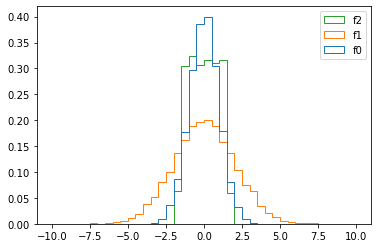

In [4]:
# Perpendicular
f0 = np.random.normal(0,1,10000)
f1 = np.random.normal(0,2,10000)
f2 = np.random.uniform(-1.6,1.6,10000)
disp(f0,f1,f2)

# test result
Uniform: 1->2 0.5; 1->3 1.0; 2->3 0.5  
Normal:  1->2 0.8; 1->3 1.6; 2->3 0.8  
Weibull: 1->2 0.9; 1->3 1.8; 2->3 0.9  
So parallel moving:
$$
T_{i}:f(x)->f(x-i) \\
\alpha T_{i}:f(x)->f(x-\alpha i) 
$$
Volume change:
$$
V_{i}:f(x)->f(\frac{1}{i}x) \\
\alpha V_{i}:f(x)->f(\frac{1}{\alpha (i-1)} x)
$$

Hyposis: 
The transiformation can be defined as the difference of characteristic function: 
$$
\phi (f+g) = \phi (f) \phi (g) \\
\phi (-f)  = \phi (-f)
$$
Test: 
Normal distribution (parrel move): 
$$
\phi_t (N(\mu,\sigma)) =  e^{it\mu - \frac{1}{2}\sigma ^2 t^2 }
$$
(1) 
$$
\phi_t (T_{01} := N(1,1) - N(0,1)) = e^{it- \frac{1}{2}t^2 } / e^{- \frac{1}{2}t^2 }  \\
\phi_t (2T_{01}) := e^{i2t}  \\
\phi_t(f_{est}) = \phi_t (2(N(1,1) - N(0,1))+N(0,1)) = e^{i2t} \times e^{- \frac{1}{2}t^2 } = \phi_t(N(2,1)) \\
$$
(2) Normal distribution (volume change): 
$$
\phi_t (V_{01} := N(0,2) - N(0,1)) = e^{-\frac{1}{2}4t^2 } / e^{- \frac{1}{2}t^2 }= e^{-\frac{3}{2}t^2 } \\
\phi_t (V_{01} := N(0,3) - N(0,2)) = e^{-\frac{9}{2}t^2 } / e^{- \frac{4}{2}t^2 }= e^{-\frac{5}{2}t^2 } \\
\phi_t (2V_{01}) := e^{-3t^2 } \\
\phi_t(f_{est}) = \phi_t (2(N(0,2) - N(0,1))+N(0,1)) = e^{-3t^2 } \times e^{- \frac{1}{2}t^2 } = e^{- \frac{7}{2}t^2 }
$$

W(f0,f1)=0.724
W(f0,f2)=0.719
W(f1,f2)=0.019
0.5205471338926775


0.5

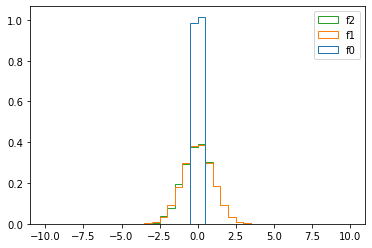

In [5]:
# test
f0 = np.sort(np.random.normal(0,0.1,10000))
#f0 = np.random.normal(0,5,10000)
f1 = np.sort(np.random.normal(0,1,10000))
#f1 = np.random.normal(0,1,10000)
df1 = np.sort(np.random.normal(0,2,10000))-np.sort(np.random.normal(0,1,10000))
f2 = f0+0.9*df1
# -0.05~1.4 | -0.1~1.7 | -0.2~2.4 | -0.3~4.4 |
disp(f0,f1,f2)
(1/4-1/6)*2+1/6*2
#print(df)